In [ ]:
# riboswitch and ribosnitch strategy

In [1]:
from utils_analysis import run_BMM_v2,run_2sample_clustering_analysis, get_flip_order, plot_inferred_proportions, plot_predicted_cluster_profile_3_NEW, plot_predicted_cluster_profile_3_NEW_manual_flip
from bmm_numba import BMMsNumba
from method_bmm_numba import BMMsNumba 

In [ ]:
## Supp_Figure_5f --- ---

In [ ]:
##  PORE-cupine ---------

In [2]:
def run_global_analysis_mod_flt_0(p_genes, p_clusters, p_start=None, p_end=None, p_min_samples=1000, p_local=False, p_seed=386, p_method="PORE-cupine",p_prop=None):
    
    if p_method == "dtw":       

        f_dir = "/data/"
        f_mtxs = [f_dir + "Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "Noligand/"+p_genes[0]+"_binary.iids",
                 f_dir + "Ligand/"+p_genes[0]+"_binary.iids"]
    
    elif p_method =="PORE-cupine":

        f_dir = "/data/"
        f_mtxs = [f_dir + "PORE-cupine/Noligand/"+p_genes[0]+"_nanopolish+porecupine_binary.mtx",
                  f_dir + "PORE-cupine/Ligand/"+p_genes[0]+"_nanopolish+porecupine_binary.mtx"]
        f_ids = [f_dir + "PORE-cupine/Noligand/"+p_genes[0]+"_nanopolish+porecupine_binary.iids",
                 f_dir + "PORE-cupine/Ligand/"+p_genes[0]+"_nanopolish+porecupine_binary.iids"]


    elif p_method == "tombo":

        f_dir = "/data/"
        f_mtxs = [f_dir + "tombo/Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "tombo/Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "tombo/Noligand/"+p_genes[0]+"_binary.iids",
                 f_dir + "tombo/Ligand/"+p_genes[0]+"_binary.iids"]


    f_sizes = "/data/reference_of_ribosxitch_v2.sizes"

    if p_start is not None and p_end is not None:
        p_length = None
    else:
        p_length = -1
    
    results  = run_2sample_clustering_analysis(f_mtxs, f_ids, p_genes, f_sizes, 
                                                p_depth=-1, p_length=p_length, p_start=p_start, p_end=p_end, 
                                                p_threshold_len_prop=0.85, p_verbose=True, 
                                                f_likelihood=None, p_clusters=p_clusters,
                                                p_no_of_runs=1,
                                                p_threshold=0.5,  #0.5, #0.0001,
                                                p_min_iters=20, #20 #300,
                                                p_seed=p_seed,
                                                p_min_samples=p_min_samples,
                                                p_unknown=0.00, 
                                                p_pos_modrate_low=0.0, p_pos_modrate_high=1.0,
                                                p_read_modrate_low=0.0075, p_read_modrate_high=0.025,
                                                p_visualize=True, p_impute=False, p_local=p_local,p_prop=p_prop)
    return results



def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes

### 2 sample clusters --- ---

def BMM_plots_truncate_specific_mod_0(gene1, gene2,start,end,p_min_samples,prop):

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = start, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                        
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW(new_X, results, params,"/data/PORE-cupine/") 



def BMM_plots_truncate_mod_0(gene1, gene2,p_min_samples,prop):

    f_sizes = "/data/reference_of_ribosxitch_v2.sizes"
    sizes = get_sizes(f_sizes)
    full_size = sizes[gene1]
    end = full_size-25

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = 25, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                    
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW(new_X, results, params,"/data/PORE-cupine/") 


### flip version
    

def BMM_plots_truncate_mod_0_flip(gene1, gene2,p_min_samples,prop):

    f_sizes = "/data/reference_of_ribosxitch_v2.sizes"
    sizes = get_sizes(f_sizes)
    full_size = sizes[gene1]
    end = full_size-25

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = 25, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                    
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW_manual_flip(new_X, results, params,"/data/PORE-cupine/")   

(28010, 3)
28010
(24445, 3)
24445
25 175 7070 7969
7070
(11022, 150)
(7070, 150)
(7070, 150)
(28010, 3)
28010
(24445, 3)
24445
0 198 7070 7969
7070
(12336, 198)
(7070, 198)
(7070, 198)
(2682, 150) (2557, 150)
(2682, 150) (2557, 150)
(1000, 150) (1000, 150)
Current Run: 0
Best Model - Run 0
[[75.68627451 34.08906883]
 [24.31372549 65.91093117]]
[[34.08906883 65.91093117]
 [75.68627451 24.31372549]]
34.08906882591093 34.08906882591093 0.5
65.91093117408907 100.0 0.5
75.68627450980392 75.68627450980392 1.5
24.313725490196077 100.0 1.5
2000
WT: 765 | MT: 1235 | UN: 0
UN WT: 0 | UN MT: 0
(579, 198)
(186, 198)
(814, 198)
(421, 198)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5419: Sett

(579, 198)
(186, 198)
(814, 198)
(421, 198)
Counter({True: 579, False: 186})
Counter({True: 814, False: 421})
0.6965
(579, 198)
(186, 198)
(814, 198)
(421, 198)
0.8307308342935875
0.6026708614280345
0.6788559748200864
0.11500255660951793
0.9759581500571858
0.835051984985316
0.8488793398688862
0.08589687579247461


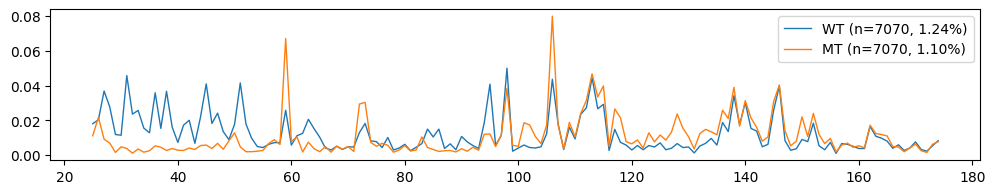

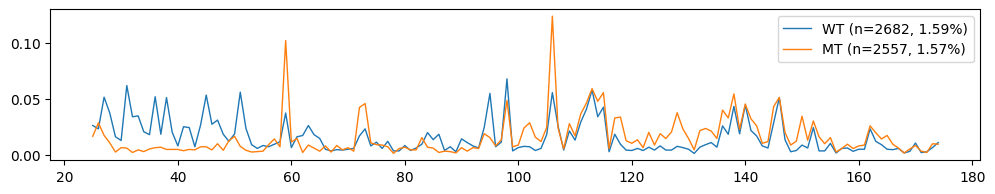

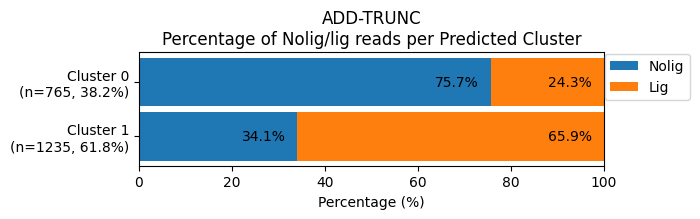

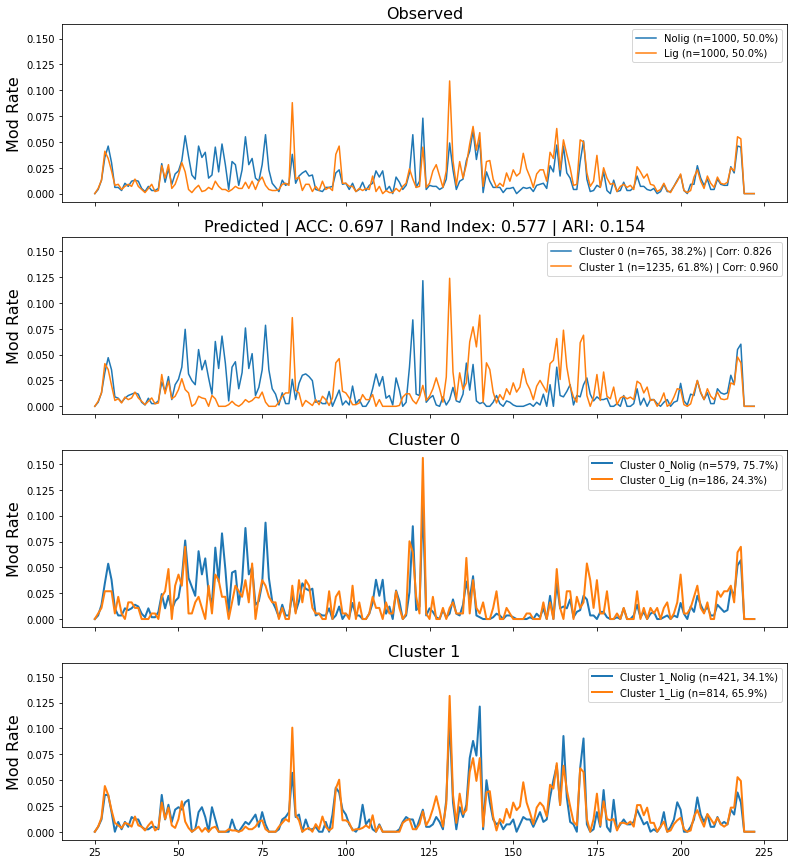

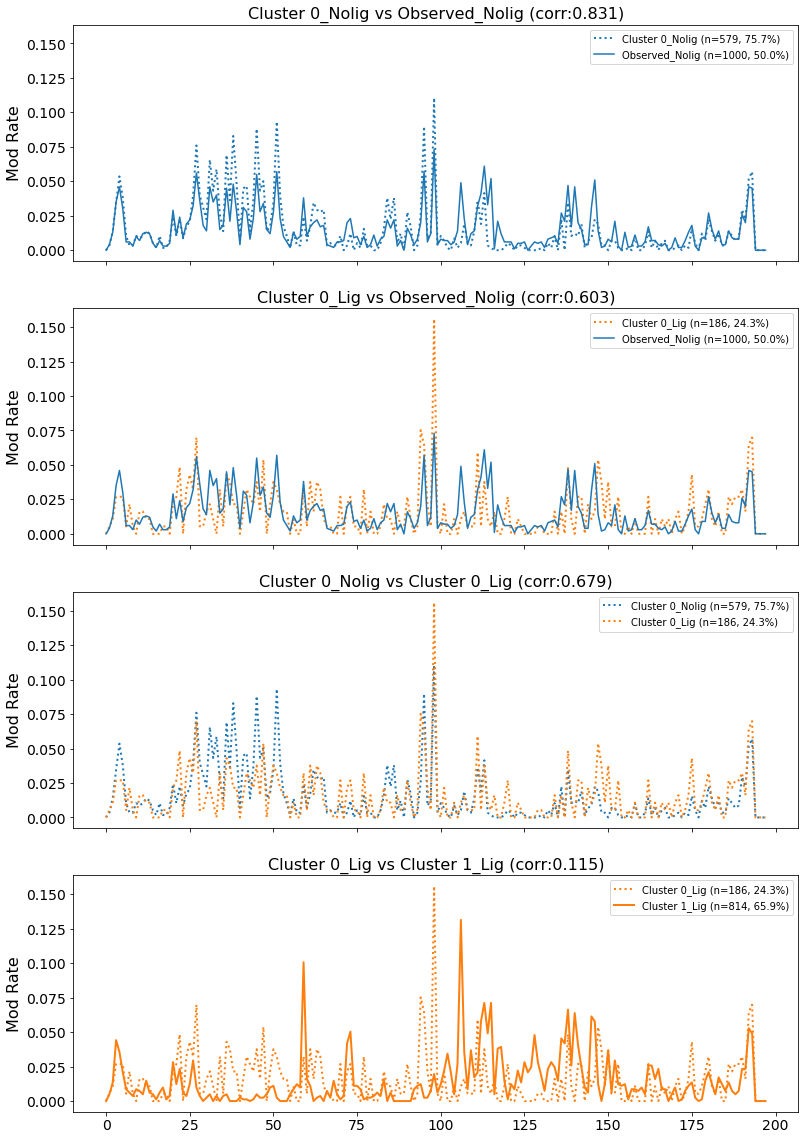

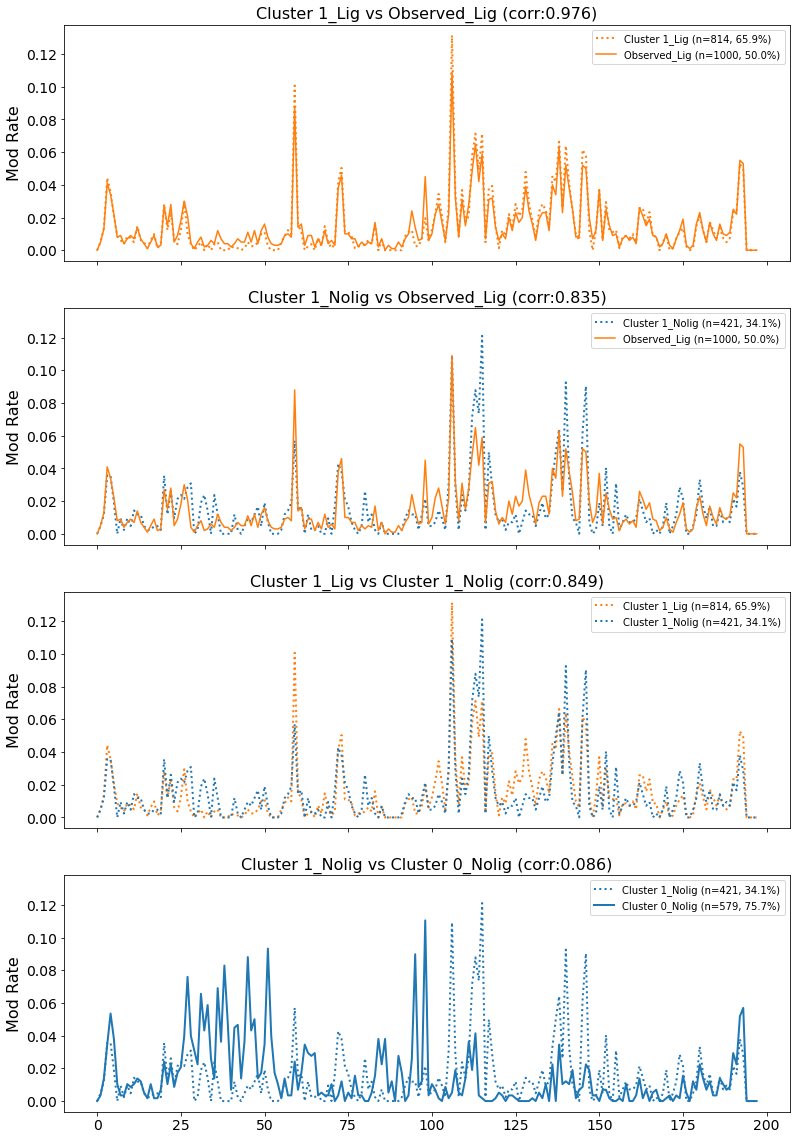

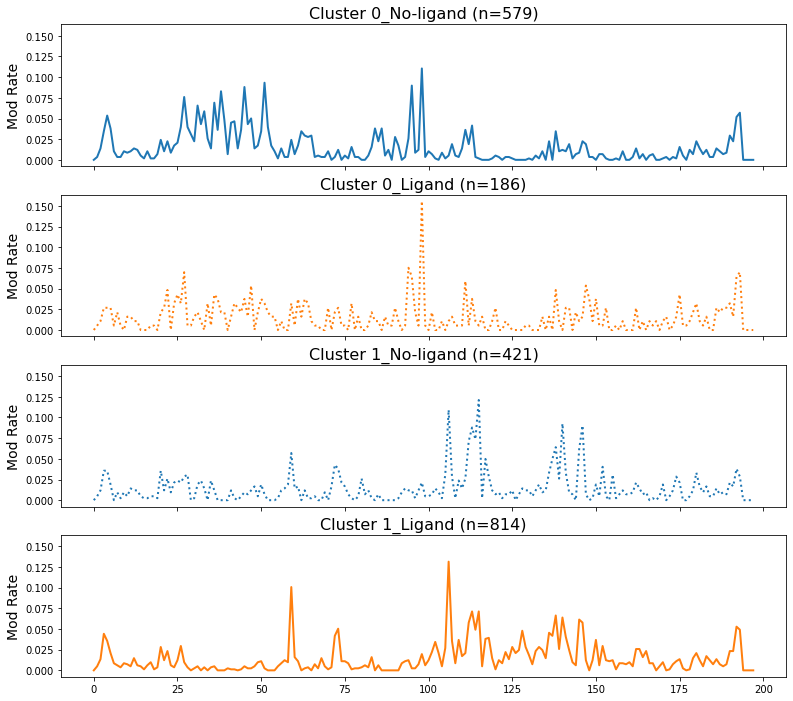

In [10]:
BMM_plots_truncate_specific_mod_0("ADD-TRUNC", "ADD-TRUNC",25,175,1000, 0.5) 

(12790, 3)
12790
(3391, 3)
3391
25 621 5697 933
933
(1861, 596)
(933, 596)
(933, 596)
(12790, 3)
12790
(3391, 3)
3391
0 646 5697 933
933
(1861, 646)
(933, 646)
(933, 646)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_io.py:229: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,(modrate <= p_modrate_low)] = 0


(750, 594) (754, 594)
(750, 594) (754, 594)
(750, 594) (750, 594)
Current Run: 0
Best Model - Run 0
[[51.49136578 48.89918888]
 [48.50863422 51.10081112]]
[[48.89918888 51.10081112]
 [51.49136578 48.50863422]]
48.8991888760139 48.8991888760139 0.5
51.10081112398609 100.0 0.5
51.49136577708007 51.49136577708007 1.5
48.50863422291994 100.0 1.5
1500
WT: 637 | MT: 863 | UN: 0
UN WT: 0 | UN MT: 0
(328, 646)
(309, 646)
(441, 646)
(422, 646)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5419: Sett

(328, 646)
(309, 646)
(441, 646)
(422, 646)
Counter({True: 328, False: 309})
Counter({True: 441, False: 422})
0.5126666666666667
(328, 646)
(309, 646)
(441, 646)
(422, 646)
0.8622857002003912
0.7522037596006531
0.8192102361423803
0.591674766500386
0.922103476213136
0.8061117834956364
0.8606375581235699
0.562096921489685


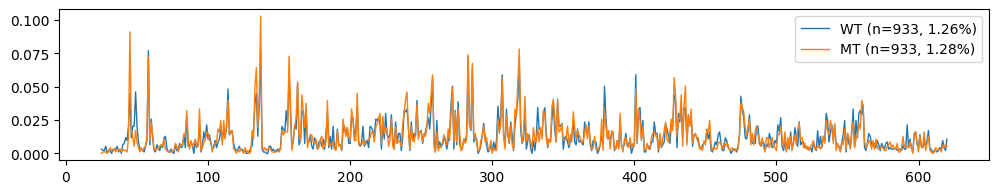

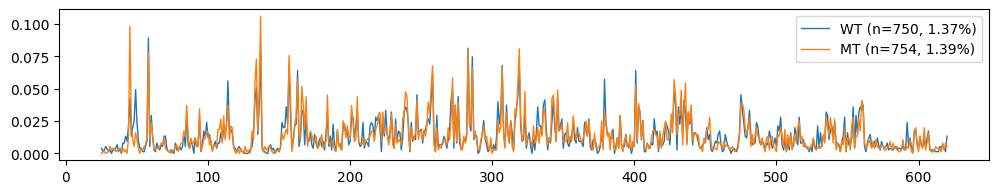

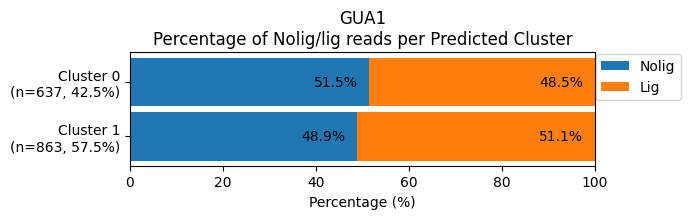

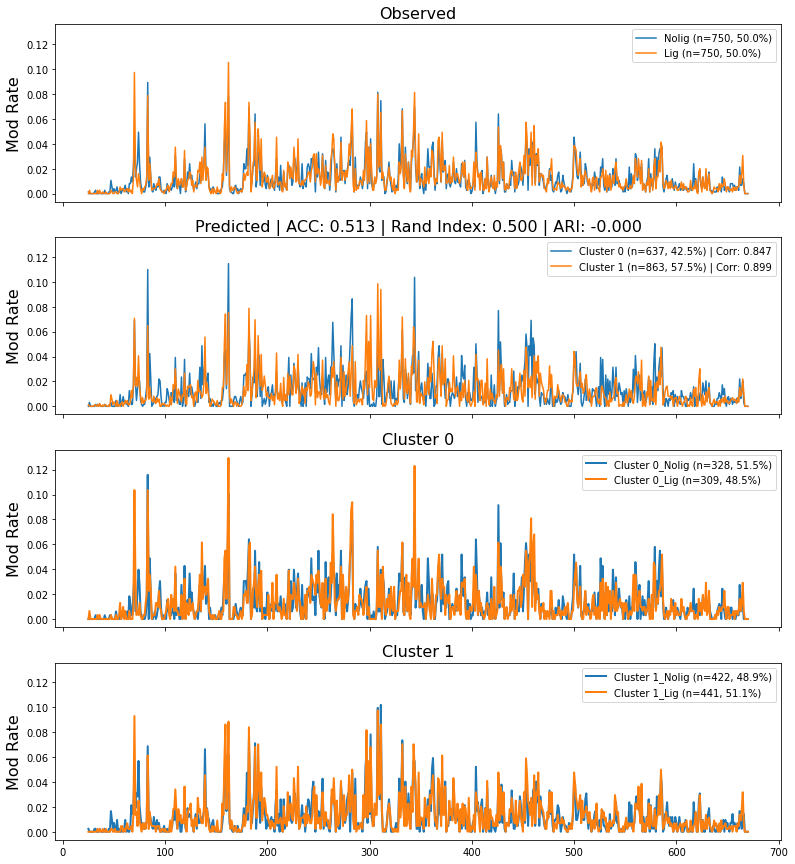

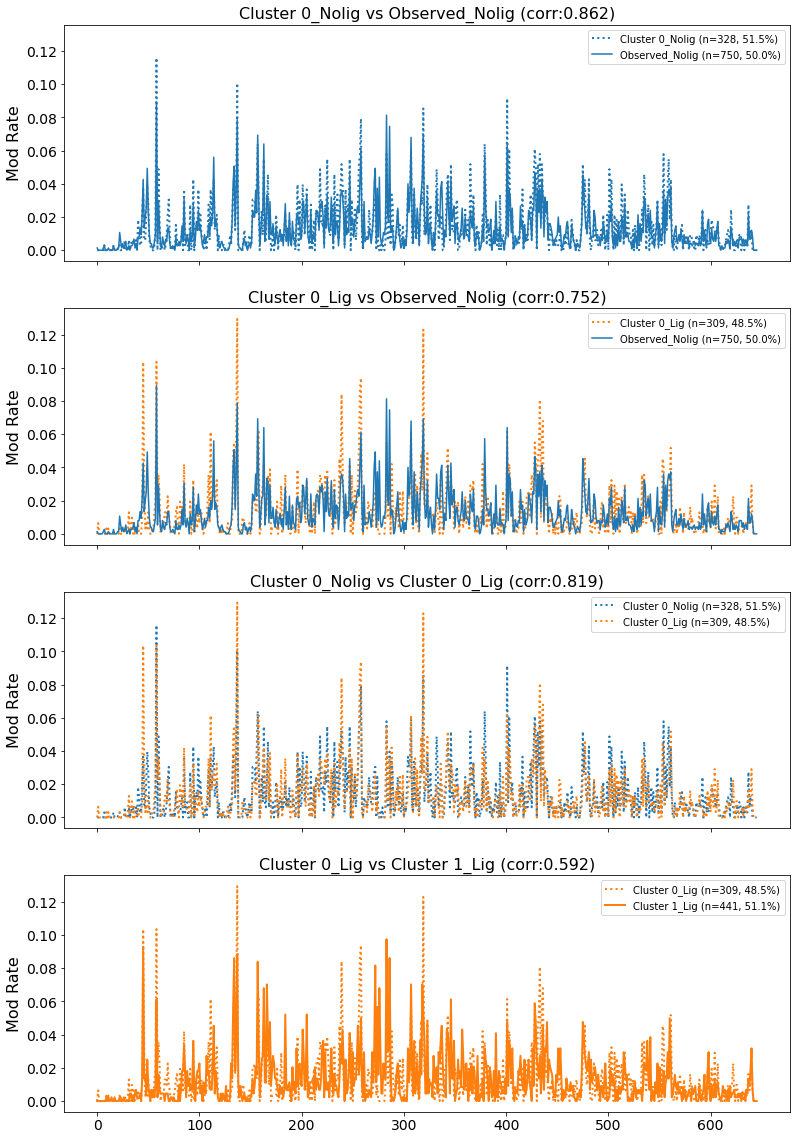

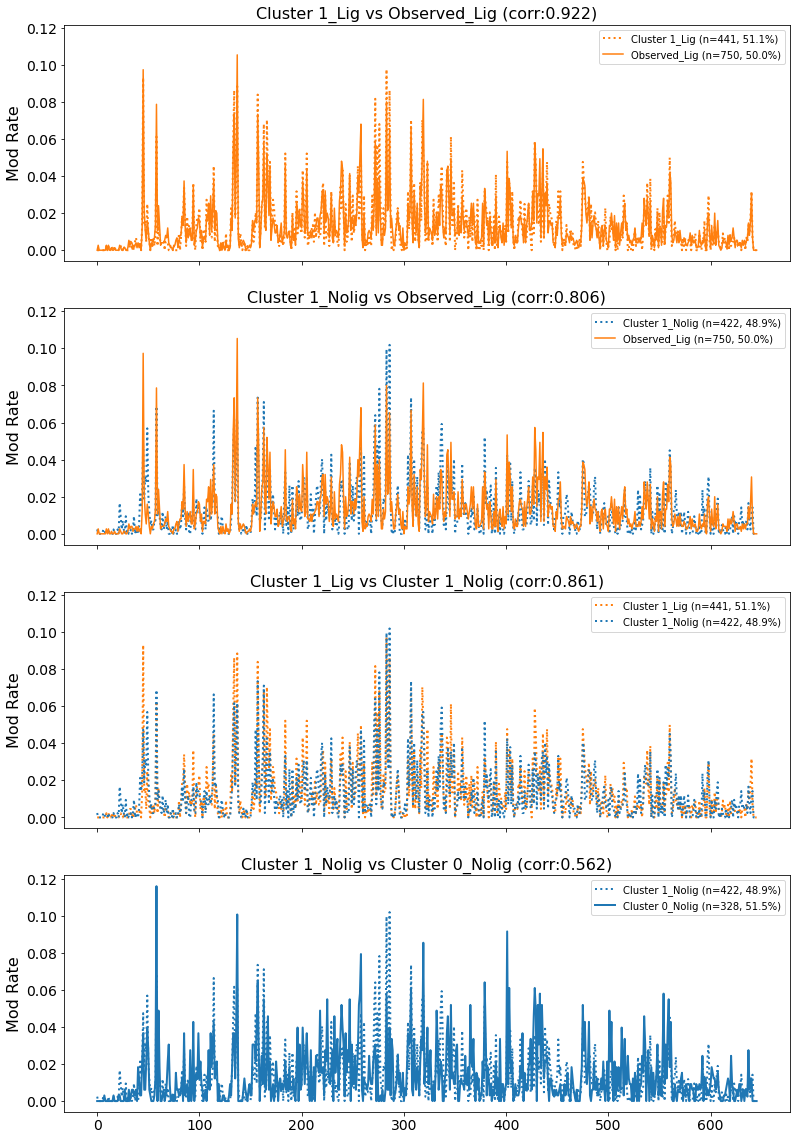

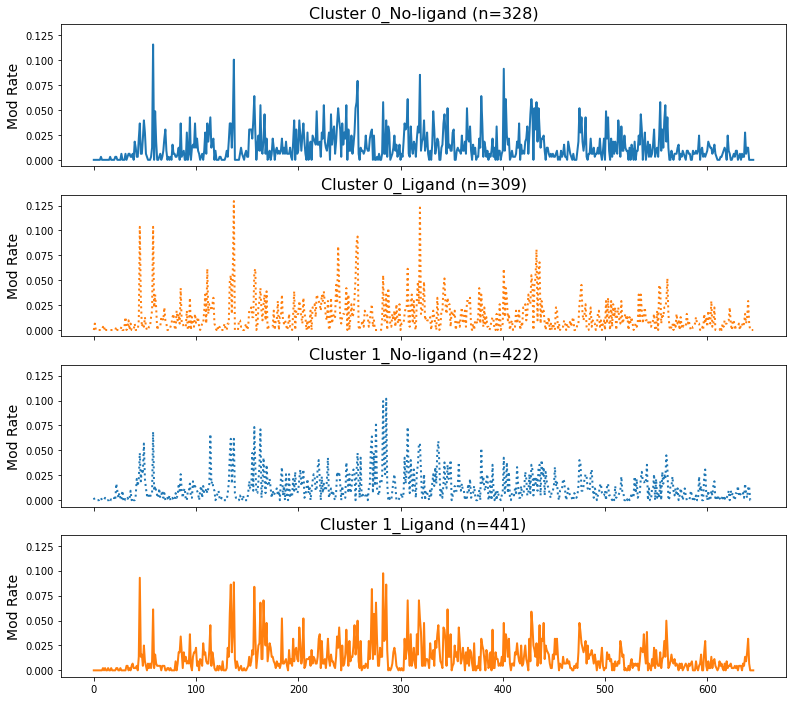

In [11]:
BMM_plots_truncate_mod_0("GUA1", "GUA1",750, 0.5)

(89119, 3)
89119
(36096, 3)
36096
25 322 13186 5679
5679
(9673, 297)
(5679, 297)
(5679, 297)
(89119, 3)
89119
(36096, 3)
36096
0 347 13186 5679
5679
(9904, 347)
(5679, 347)
(5679, 347)
(2378, 297) (2118, 297)
(2378, 297) (2118, 297)
(1000, 297) (1000, 297)
Current Run: 0
Best Model - Run 0
[[53.5678392  46.46766169]
 [46.4321608  53.53233831]]
[[46.46766169 53.53233831]
 [53.5678392  46.4321608 ]]
46.46766169154229 46.46766169154229 0.5
53.53233830845772 100.0 0.5
53.56783919597991 53.56783919597991 1.5
46.4321608040201 100.0 1.5
2000
WT: 995 | MT: 1005 | UN: 0
UN WT: 0 | UN MT: 0
(533, 347)
(462, 347)
(538, 347)
(467, 347)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7789: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7791: Sett

(533, 347)
(462, 347)
(538, 347)
(467, 347)
Counter({True: 533, False: 462})
Counter({True: 538, False: 467})
0.5355
(533, 347)
(462, 347)
(538, 347)
(467, 347)
0.8144571249886957
0.5277301870663303
0.5826150210227378
0.4334977285885263
0.8622115730762868
0.678733691048247
0.8156602043526245
0.38680328554106774


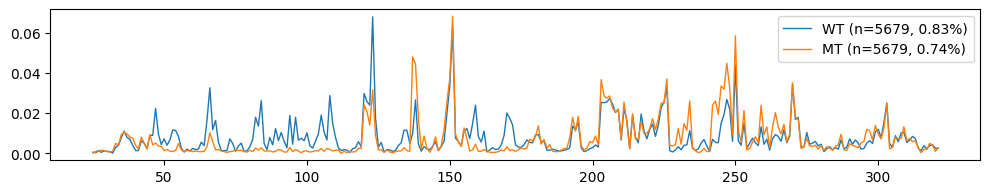

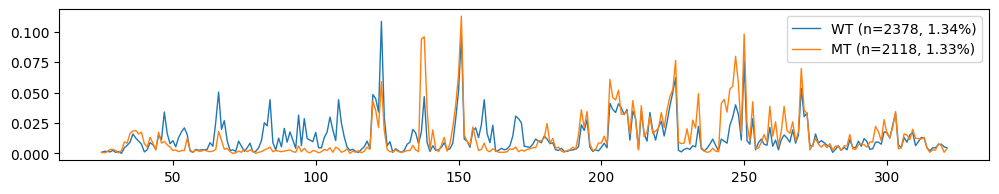

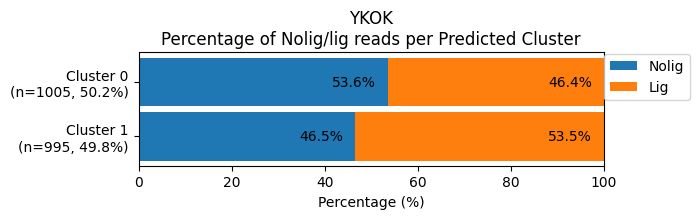

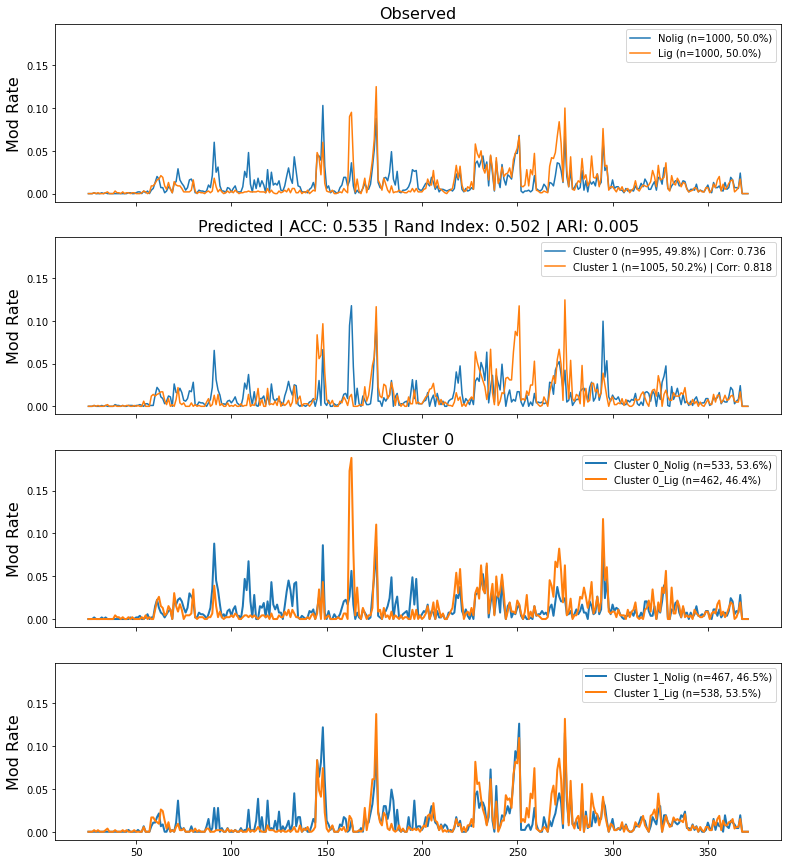

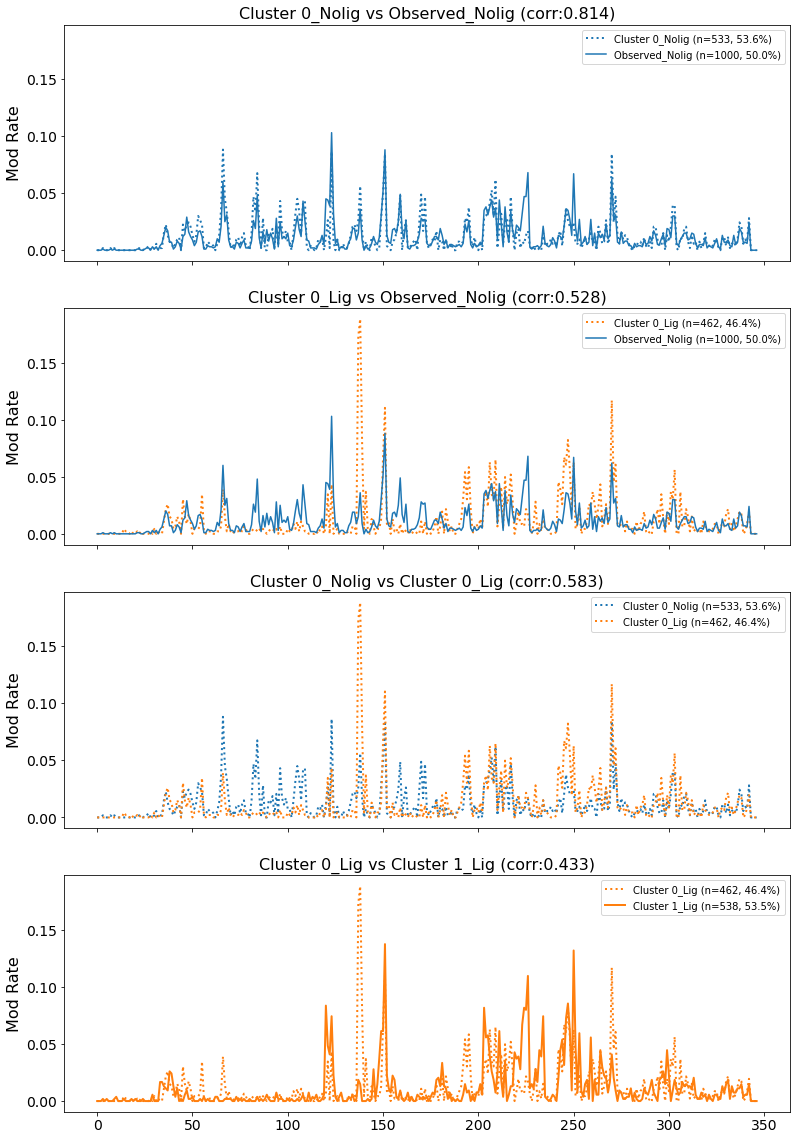

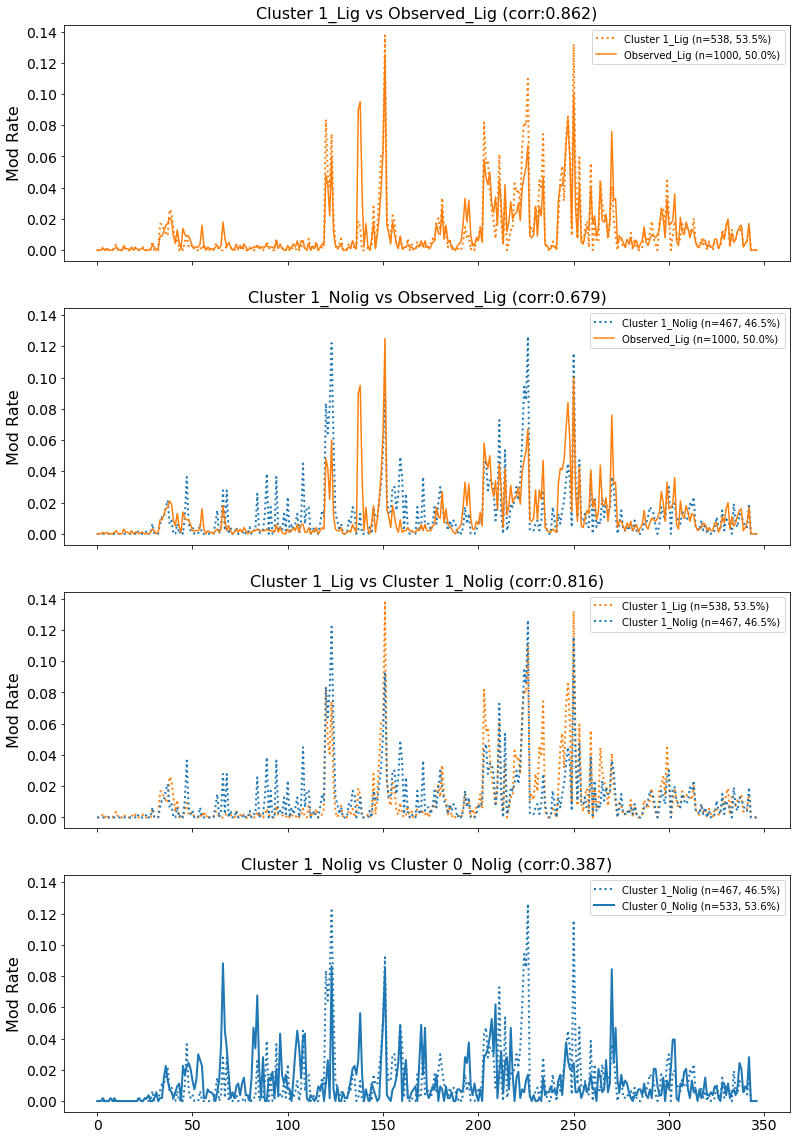

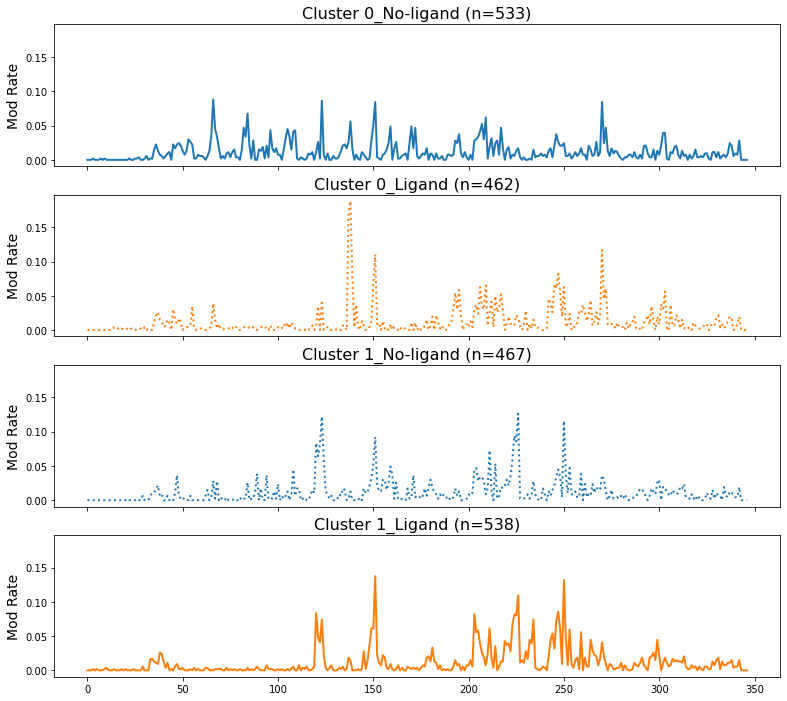

In [3]:
BMM_plots_truncate_mod_0_flip("YKOK", "YKOK",1000, 0.5) 

In [ ]:
### tombo  --- ---

In [4]:
def run_global_analysis_mod_flt_0(p_genes, p_clusters, p_start=None, p_end=None, p_min_samples=1000, p_local=False, p_seed=386, p_method="tombo",p_prop=None):
    
    if p_method == "dtw":       

        f_dir = "/data/"
        f_mtxs = [f_dir + "Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "Noligand/"+p_genes[0]+"_binary.iids",
                 f_dir + "Ligand/"+p_genes[0]+"_binary.iids"]
    
    elif p_method =="PORE-cupine":

        f_dir = "/data/"
        f_mtxs = [f_dir + "PORE-cupine/Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "PORE-cupine/Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "PORE-cupine/Noligand/"+p_genes[0]+"_binary.iids",
                 f_dir + "PORE-cupine/Ligand/"+p_genes[0]+"_binary.iids"]


    elif p_method == "tombo":

        f_dir = "/data/"
        f_mtxs = [f_dir + "tombo/Noligand/"+p_genes[0]+"_binary.mtx",
                  f_dir + "tombo/Ligand/"+p_genes[0]+"_binary.mtx"]
        f_ids = [f_dir + "tombo/Noligand/"+p_genes[0]+"_binary.iids",
                 f_dir + "tombo/Ligand/"+p_genes[0]+"_binary.iids"]


    f_sizes = "/data/reference_of_ribosxitch_v2.sizes"

    if p_start is not None and p_end is not None:
        p_length = None
    else:
        p_length = -1
    
    results  = run_2sample_clustering_analysis(f_mtxs, f_ids, p_genes, f_sizes, 
                                                p_depth=-1, p_length=p_length, p_start=p_start, p_end=p_end, 
                                                p_threshold_len_prop=0.85, p_verbose=True, 
                                                f_likelihood=None, p_clusters=p_clusters,
                                                p_no_of_runs=1,
                                                p_threshold=0.5,  #0.5, #0.0001,
                                                p_min_iters=20, #20 #300,
                                                p_seed=p_seed,
                                                p_min_samples=p_min_samples,
                                                p_unknown=0.00, 
                                                p_pos_modrate_low=0.0, p_pos_modrate_high=1.0,
                                                p_read_modrate_low=0.0075, p_read_modrate_high=0.025,
                                                p_visualize=True, p_impute=False, p_local=p_local,p_prop=p_prop)
    return results



def get_sizes(f_sizes):
    sizes = {}
    with open(f_sizes, "r") as f:
        for line in f:
            row = line.strip("\r\n").split("\t")
            sizes[row[0]] = int(row[1])
    return sizes

### 2 sample clusters --- ---
### 2 sample clusters --- ---

def BMM_plots_truncate_specific_mod_0(gene1, gene2,start,end,p_min_samples,prop):

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = start, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                        
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW(new_X, results, params, "/data/tombo/") 


### flip version
    

def BMM_plots_truncate_mod_0_flip(gene1, gene2,p_min_samples,prop):

    f_sizes = "/data/reference_of_ribosxitch_v2.sizes"
    sizes = get_sizes(f_sizes)
    full_size = sizes[gene1]
    end = full_size-25

    p_genes = [gene1, gene2]
    p_clusters = 2
    p_min_samples = p_min_samples
    p_start, p_end = 25, end
    p_local = False
    p_prop = prop

    model, results, params, new_X = run_global_analysis_mod_flt_0(p_genes, p_clusters, 
                                                                  p_start=p_start,
                                                                  p_end=p_end,
                                                                  p_min_samples=p_min_samples,
                                                                  p_local=p_local,
                                                                  p_prop=p_prop)
                                                    
    flip_order = get_flip_order(new_X, results, params)
    plot_inferred_proportions(new_X, results, params, flip_order)
    plot_predicted_cluster_profile_3_NEW_manual_flip(new_X, results, params, "/data/tombo/") 

(116461, 3)
116461
(112454, 3)
112454
25 175 77987 83950
77987
(152831, 150)
(77987, 150)
(77987, 150)
(116461, 3)
116461
(112454, 3)
112454
0 198 77987 83950
77987
(155974, 198)
(77987, 198)
(77987, 198)
(22399, 150) (23317, 150)
(22399, 150) (23317, 150)
(1000, 150) (1000, 150)
Current Run: 0
Best Model - Run 0
[[57.76       37.06666667]
 [42.24       62.93333333]]
[[37.06666667 62.93333333]
 [57.76       42.24      ]]
37.06666666666666 37.06666666666666 0.5
62.93333333333333 100.0 0.5
57.76 57.76 1.5
42.24 100.0 1.5
2000
WT: 1250 | MT: 750 | UN: 0
UN WT: 0 | UN MT: 0
(722, 198)
(528, 198)
(472, 198)
(278, 198)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:5419: Sett

(722, 198)
(528, 198)
(472, 198)
(278, 198)
Counter({True: 722, False: 528})
Counter({True: 472, False: 278})
0.597
(722, 198)
(528, 198)
(472, 198)
(278, 198)
0.900550663655971
0.7037432564099205
0.7438487013683645
0.19207898008080235
0.7645824042386147
0.6390355517026926
0.8337227262388887
0.11448736963239947


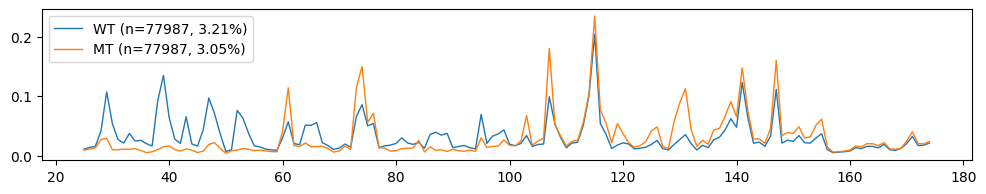

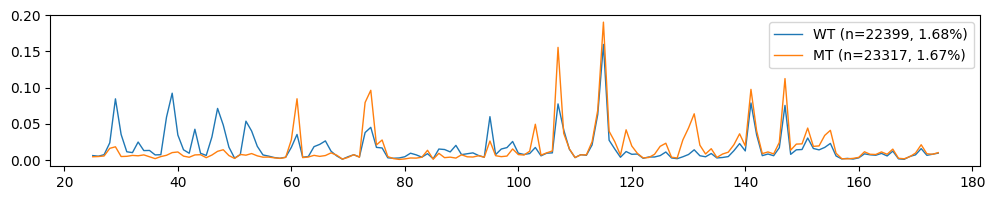

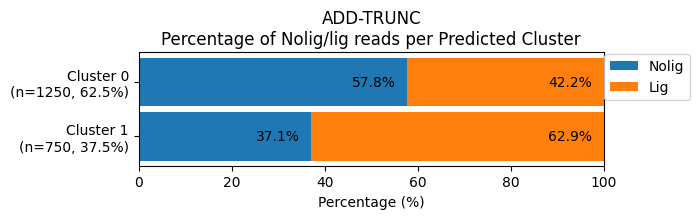

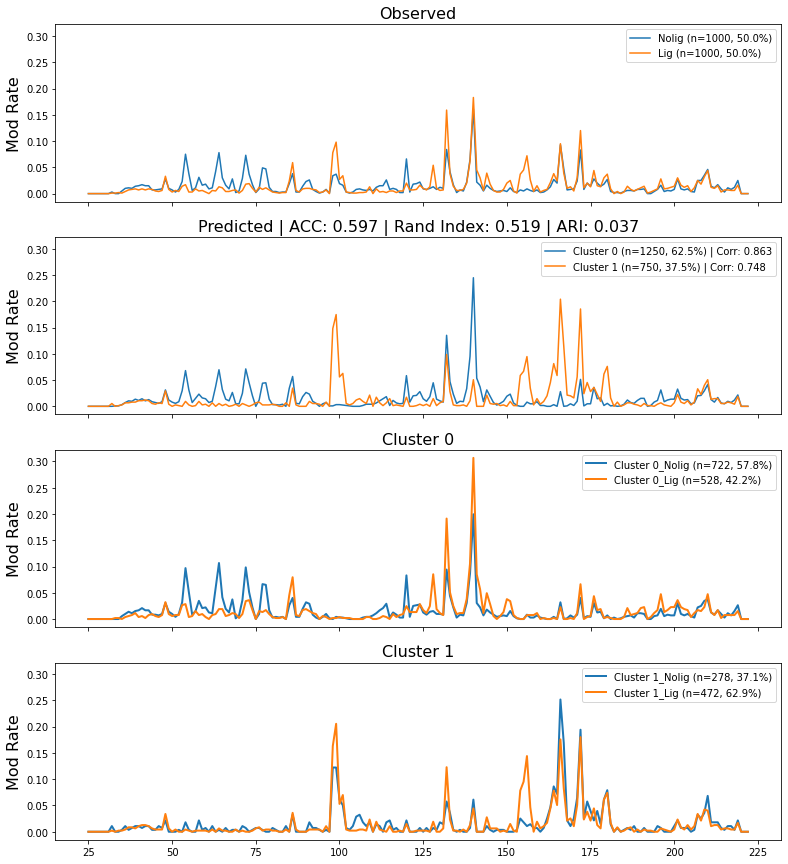

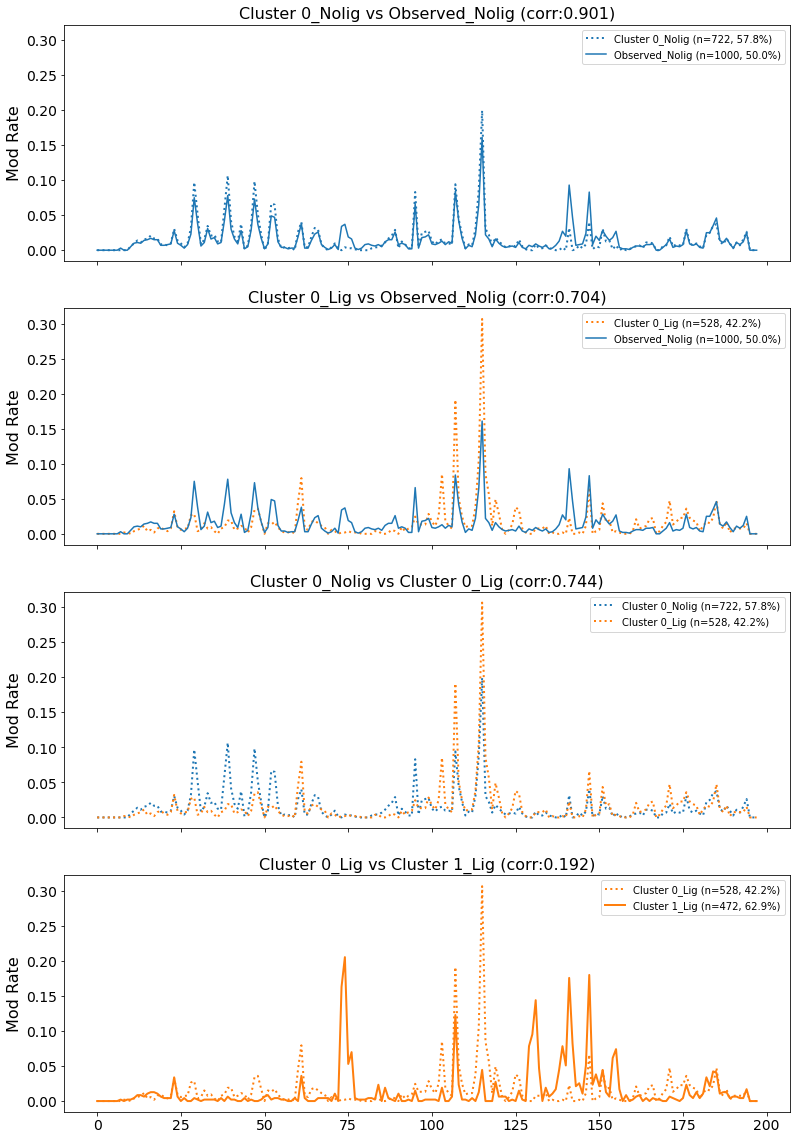

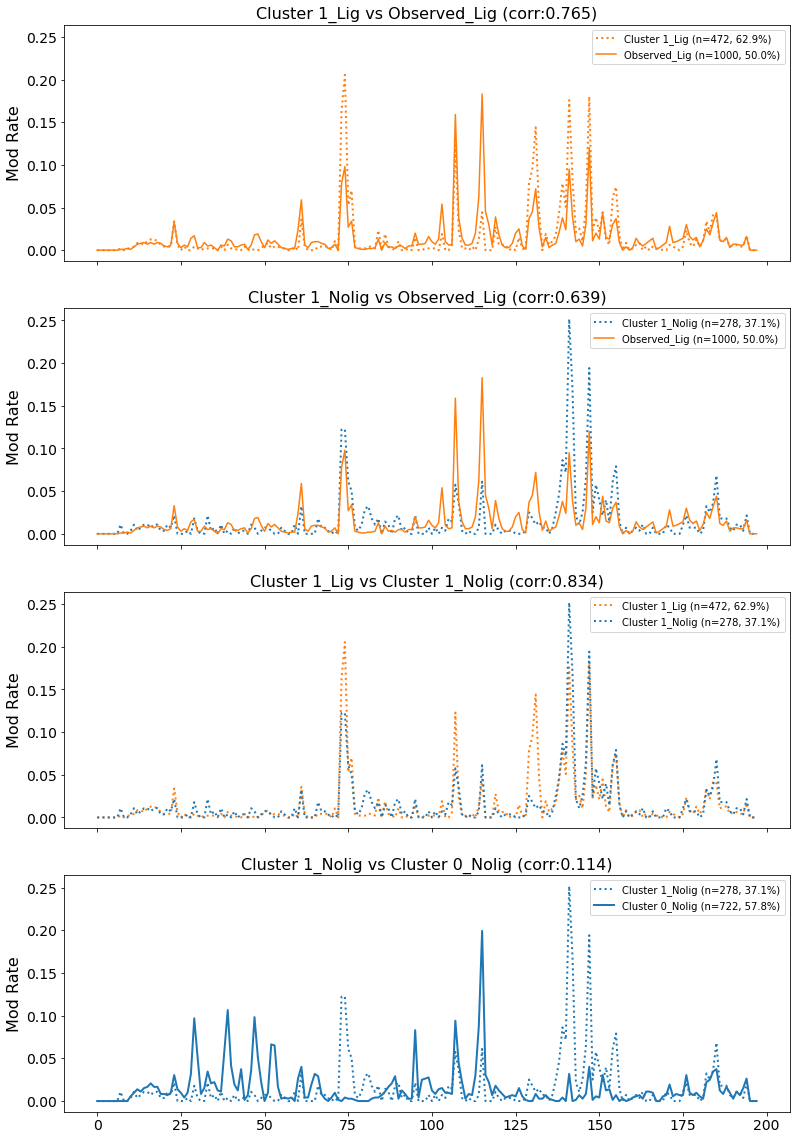

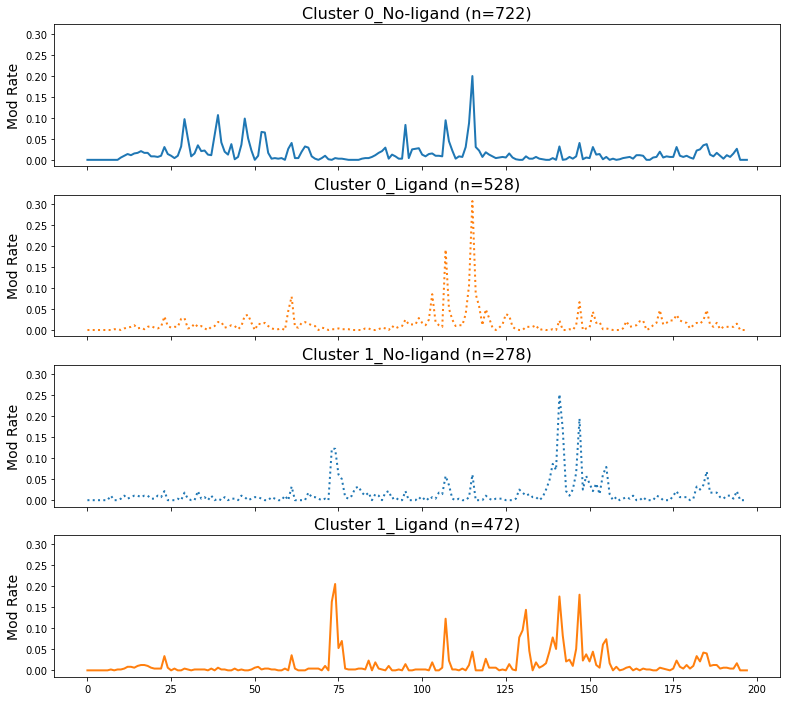

In [5]:
BMM_plots_truncate_specific_mod_0("ADD-TRUNC", "ADD-TRUNC",25,175,1000, 0.5)

(24646, 3)
24646
(10652, 3)
10652
25 621 6421 1035
1035
(2070, 596)
(1035, 596)
(1035, 596)
(24646, 3)
24646
(10652, 3)
10652
0 646 6421 1035
1035
(2070, 646)
(1035, 646)
(1035, 646)
(290, 596) (362, 596)
(290, 596) (362, 596)
(250, 596) (250, 596)
Current Run: 0
Best Model - Run 0
[[54.16666667 45.33898305]
 [45.83333333 54.66101695]]
[[45.33898305 54.66101695]
 [54.16666667 45.83333333]]
45.33898305084746 45.33898305084746 0.5
54.66101694915254 100.0 0.5
54.166666666666664 54.166666666666664 1.5
45.83333333333333 100.0 1.5
500
WT: 264 | MT: 236 | UN: 0
UN WT: 0 | UN MT: 0
(143, 646)
(121, 646)
(129, 646)
(107, 646)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7789: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7791: Sett

(143, 646)
(121, 646)
(129, 646)
(107, 646)
Counter({True: 143, False: 121})
Counter({True: 129, False: 107})
0.544
(143, 646)
(121, 646)
(129, 646)
(107, 646)
0.8941677116655218
0.7829112519081111
0.8407760095971627
0.48135864924419874
0.8583004690827295
0.6421807009594452
0.7418262203083852
0.3586631938621759


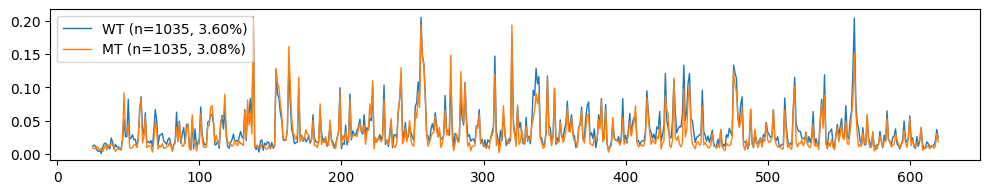

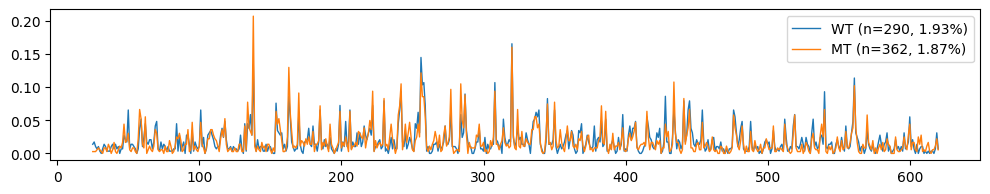

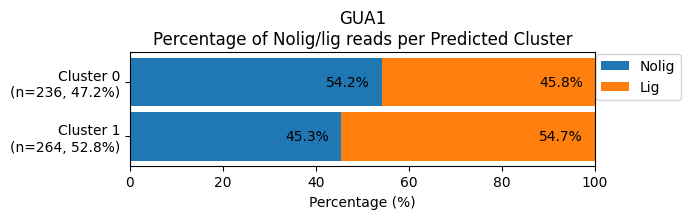

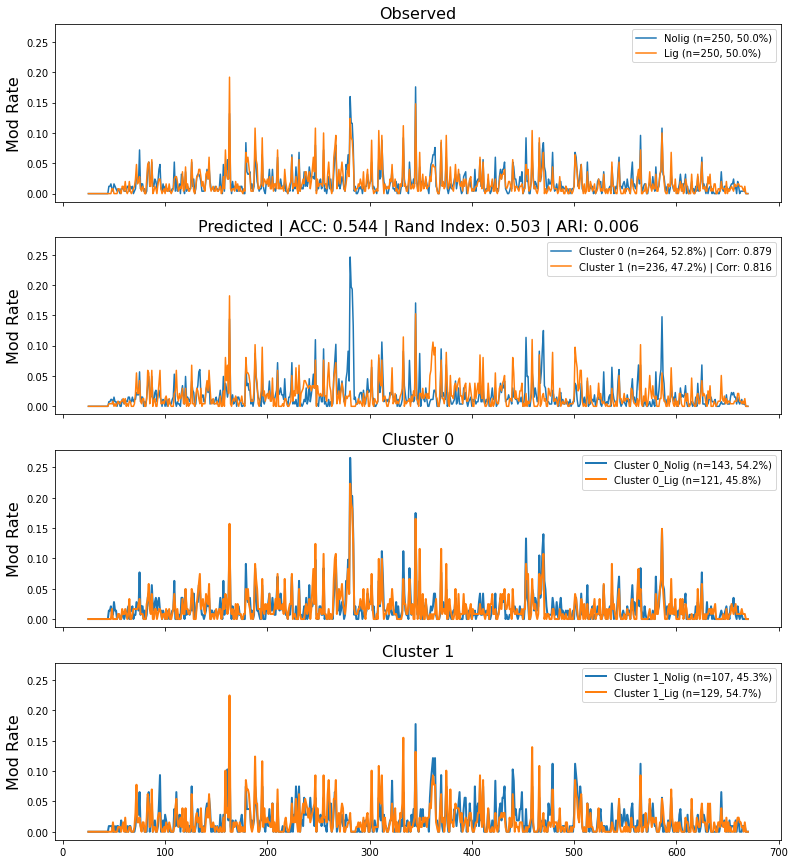

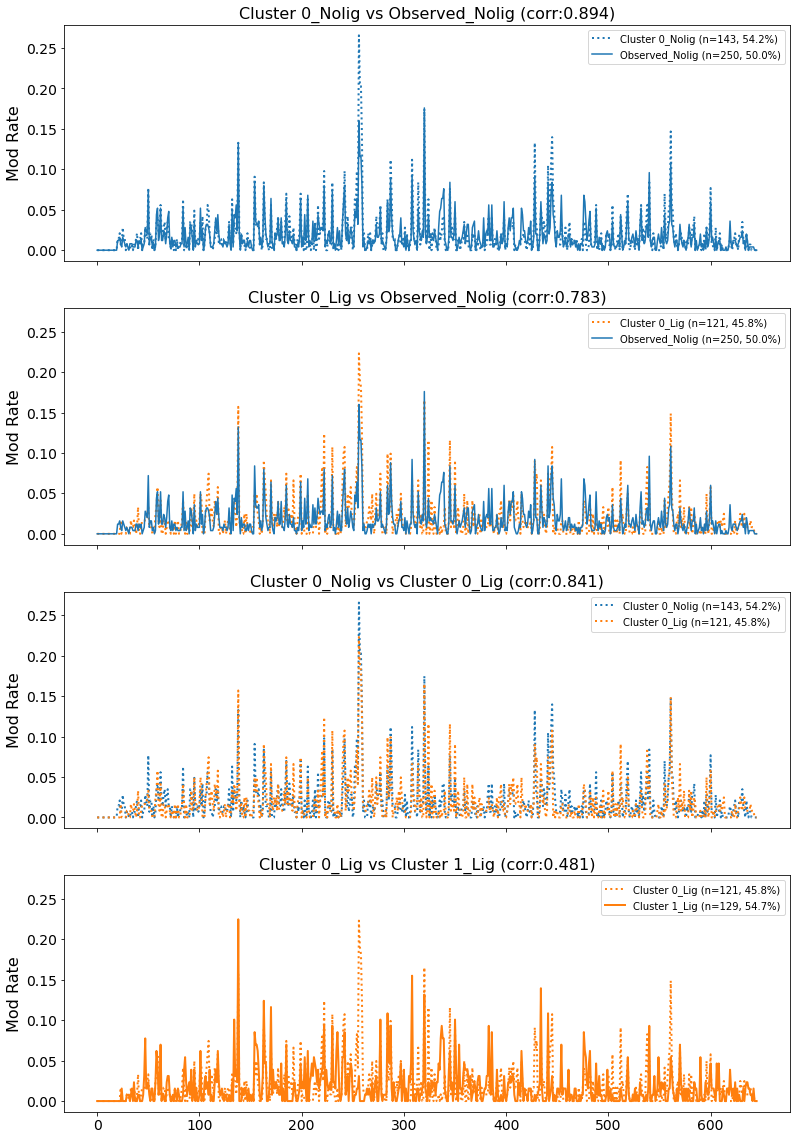

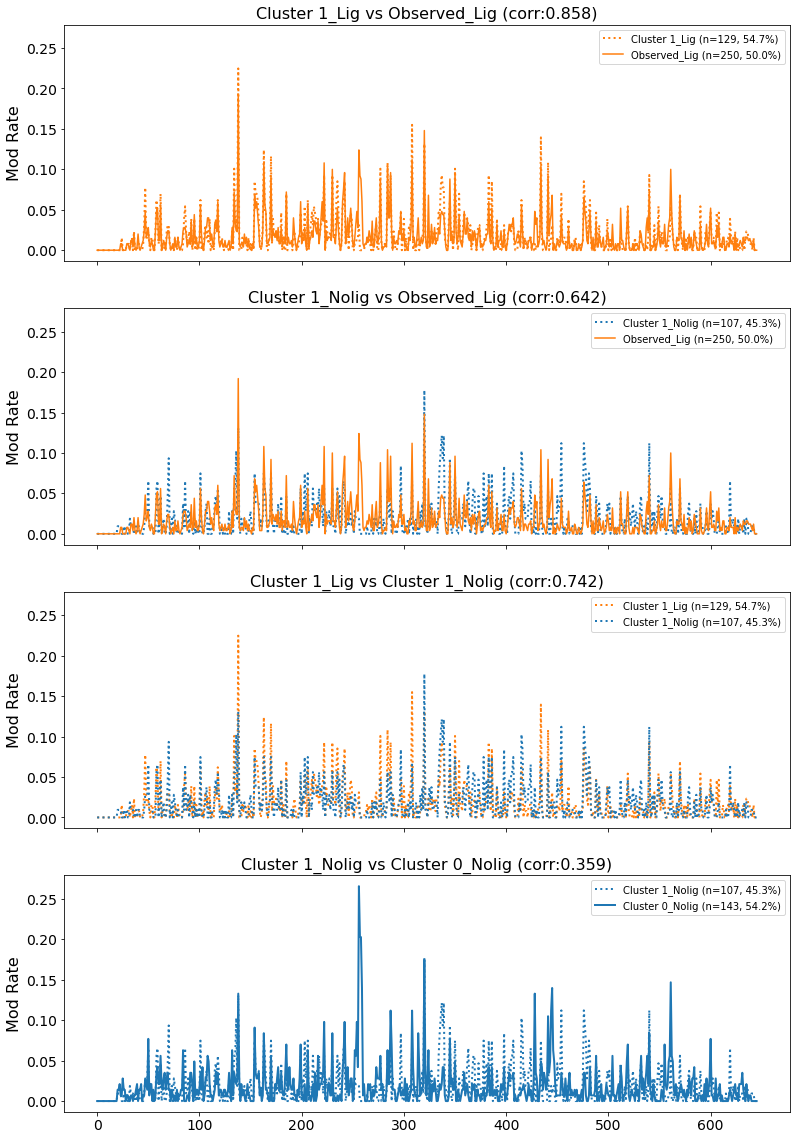

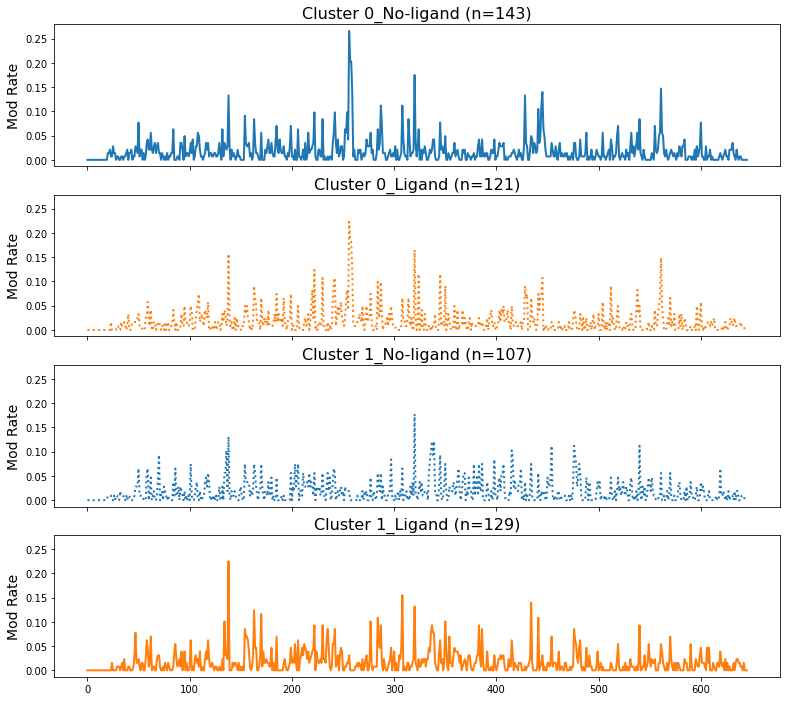

In [6]:
BMM_plots_truncate_mod_0_flip("GUA1", "GUA1",250, 0.5)

(105491, 3)
105491
(46273, 3)
46273
25 322 53777 21323
21323
(42451, 297)
(21323, 297)
(21323, 297)
(105491, 3)
105491
(46273, 3)
46273
0 347 53777 21323
21323
(42535, 347)
(21323, 347)
(21323, 347)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_io.py:229: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,(modrate <= p_modrate_low)] = 0


(6710, 296) (8437, 296)
(6710, 296) (8437, 296)
(1000, 296) (1000, 296)
Current Run: 0
Best Model - Run 0
[[51.44138373 44.87471526]
 [48.55861627 55.12528474]]
[[44.87471526 55.12528474]
 [51.44138373 48.55861627]]
44.874715261959 44.874715261959 0.5
55.125284738041 100.0 0.5
51.44138372837924 51.44138372837924 1.5
48.55861627162076 100.0 1.5
2000
WT: 1561 | MT: 439 | UN: 0
UN WT: 0 | UN MT: 0
(803, 347)
(758, 347)
(242, 347)
(197, 347)


/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7789: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inWT['group'] = 'X_pred_WT_inWT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pred_WT_inMT['group'] = 'X_pred_WT_inMT'
/shared/users/hanjian/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig5/utils_analysis.py:7791: Sett

(803, 347)
(758, 347)
(242, 347)
(197, 347)
Counter({True: 803, False: 758})
Counter({True: 242, False: 197})
0.5225
(803, 347)
(758, 347)
(242, 347)
(197, 347)
0.9174468370491426
0.7140011905291886
0.7680127245367402
0.19125333233814326
0.5901937870994503
0.5100662492433986
0.9386426778499929
0.1337645182897345


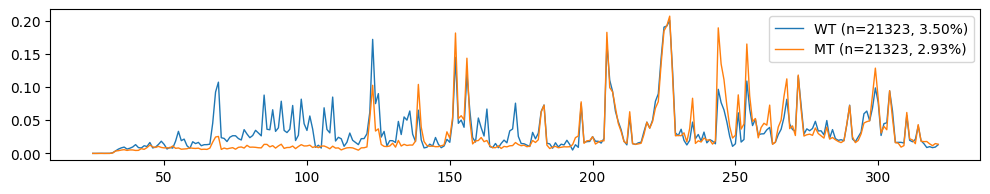

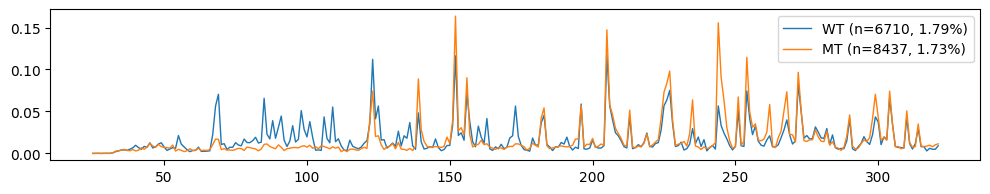

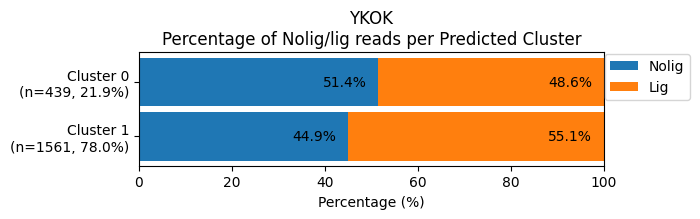

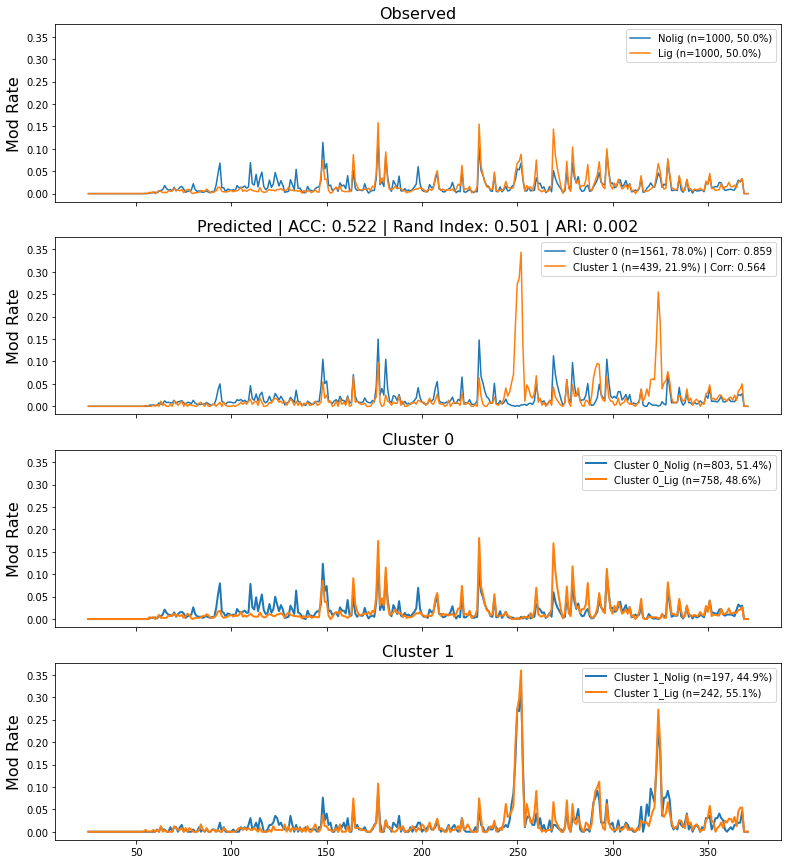

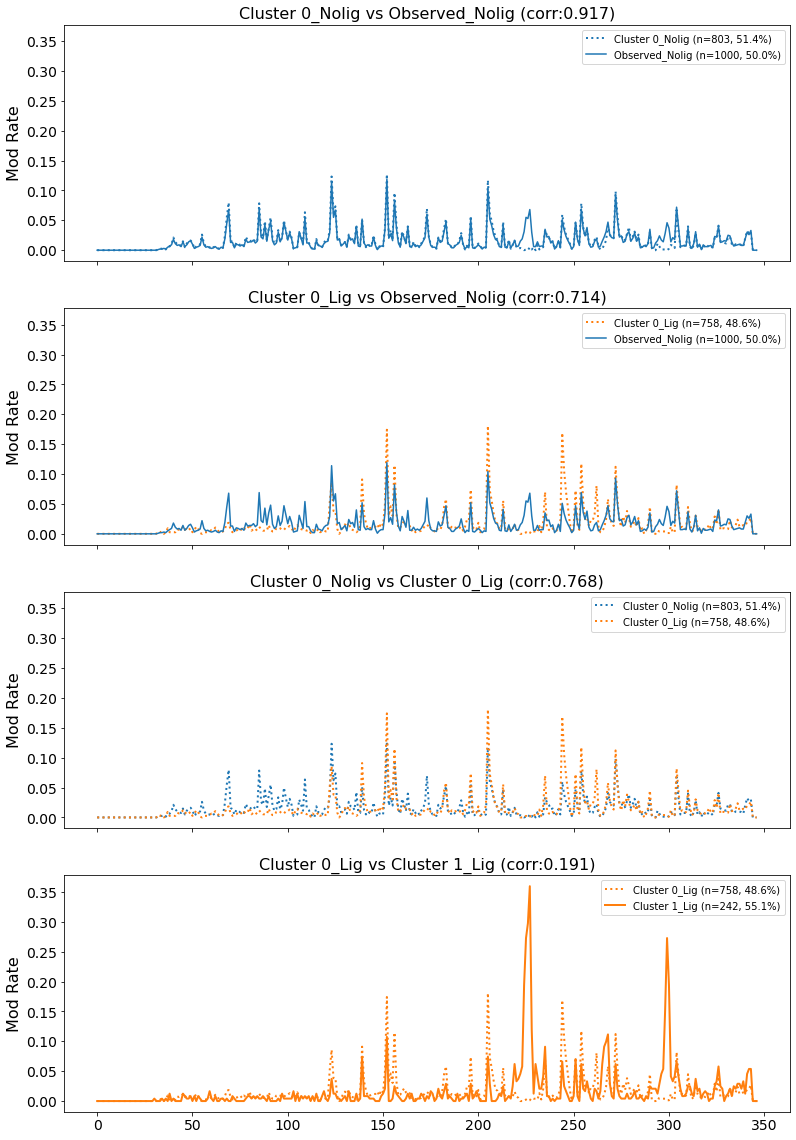

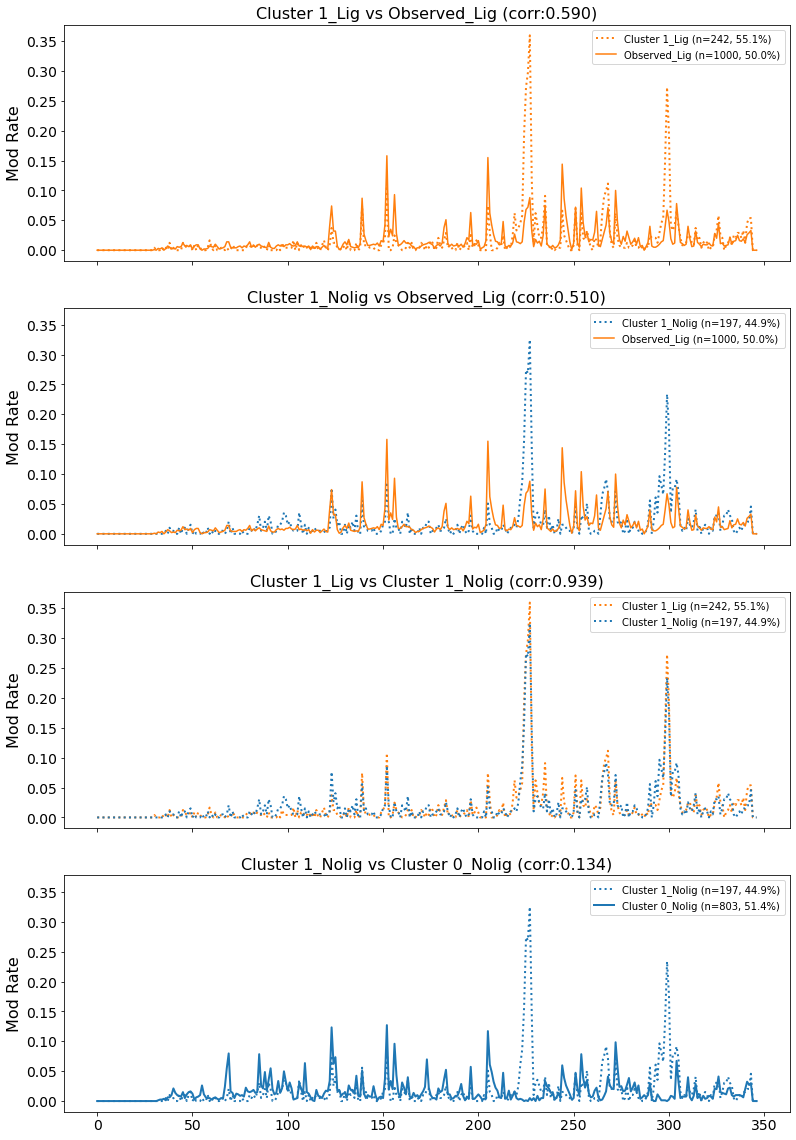

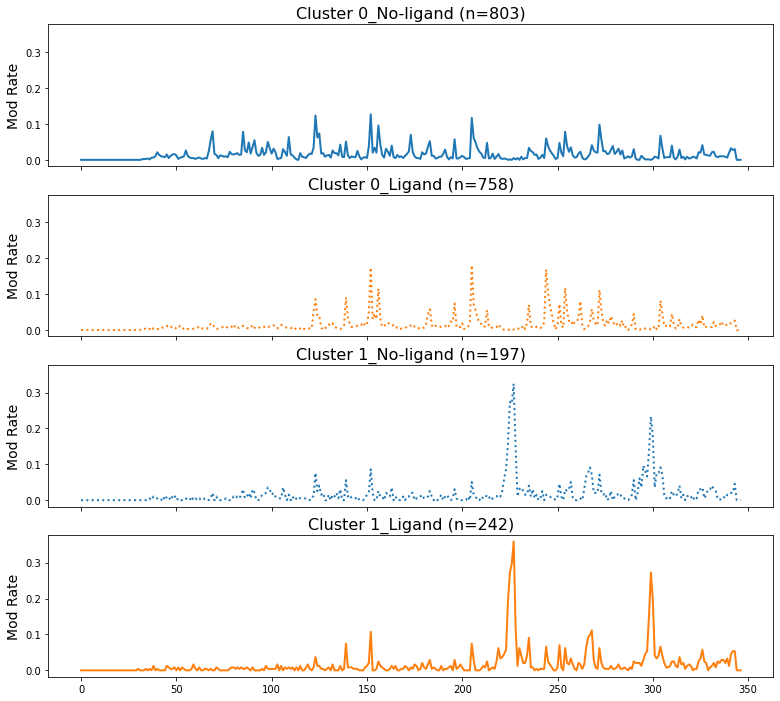

In [7]:
BMM_plots_truncate_mod_0_flip("YKOK", "YKOK",1000, 0.5) 